In [1]:
import pandas as pd 
from datetime import date
from datetime import datetime

In [12]:
df_priceav = pd.read_csv('../data/desafio_priceav.csv')

In [3]:
df_priceav.head()

,Unnamed: 0,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied
0,0,2148,40201349,blank,2020-11-15,250.0,0
1,1,2159,40201349,blank,2020-11-26,250.0,0
2,2,2160,40201349,blank,2020-11-27,250.0,0
3,3,2173,40201349,blank,2020-12-10,250.0,0
4,4,2226,40201349,blank,2021-02-01,250.0,0


removendo as linhas que não contem a data em que foi reservado

In [13]:
df_priceav = df_priceav[df_priceav['booked_on'] != 'blank']
df_priceav.head()

,Unnamed: 0,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied
12,12,6452,40206270,2021-01-01 00:00:00,2021-01-01,380.0,1
13,13,6453,40206270,2021-01-01 00:00:00,2021-01-02,380.0,1
52,52,6492,40206270,2021-02-10 00:00:00,2021-02-10,195.0,1
53,53,6493,40206270,2021-02-10 00:00:00,2021-02-11,350.0,1
54,54,6494,40206270,2021-02-10 00:00:00,2021-02-12,350.0,1


calculando a antecedencia média das reservas

In [14]:
# removendo horario de booked_on
df_priceav['booked_on'] = [x[:10] for x in df_priceav['booked_on']]

# convertendo booked_on e date para o formato datetime
df_priceav['booked_on'] = pd.to_datetime(df_priceav['booked_on'])
df_priceav['date'] = pd.to_datetime(df_priceav['date'])
df_priceav['antecedencia media das reserva'] = (df_priceav['date'] - df_priceav['booked_on']).dt.days
df_priceav

,Unnamed: 0,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied,antecedencia media das reserva
12,12,6452,40206270,2021-01-01,2021-01-01,380.0,1,0
13,13,6453,40206270,2021-01-01,2021-01-02,380.0,1,1
52,52,6492,40206270,2021-02-10,2021-02-10,195.0,1,0
53,53,6493,40206270,2021-02-10,2021-02-11,350.0,1,1
54,54,6494,40206270,2021-02-10,2021-02-12,350.0,1,2
...,...,...,...,...,...,...,...,...
354508,64589,4298108,40199361,2020-09-16,2021-03-19,250.0,1,184
354514,64595,4298114,40199361,2020-09-14,2021-03-25,250.0,1,192
354517,64598,4298117,40199361,2020-09-14,2021-03-28,250.0,1,195
354518,64599,4298118,40199361,2020-09-14,2021-03-29,250.0,1,196


In [15]:
media = df_priceav['antecedencia media das reserva'].mean()
print(f'a antecedência média das reservas são de {round(media)} Dias')


a antecedência média das reservas são de 32 Dias


Calculando antecedencia por dia da semana

In [16]:

DIAS = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-Feira', 'Sexta-feira', 'Sábado', 'Domingo']

In [17]:
def get_dia_da_semana(dt):
    return DIAS[dt.weekday()]


In [18]:
df_priceav['dia_da_semana'] = df_priceav['date'].map(get_dia_da_semana)
df_priceav['dia_da_semana_int'] = df_priceav['date'].dt.weekday
df_priceav.head()

,Unnamed: 0,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied,antecedencia media das reserva,dia_da_semana,dia_da_semana_int
12,12,6452,40206270,2021-01-01,2021-01-01,380.0,1,0,Sexta-feira,4
13,13,6453,40206270,2021-01-01,2021-01-02,380.0,1,1,Sábado,5
52,52,6492,40206270,2021-02-10,2021-02-10,195.0,1,0,Quarta-feira,2
53,53,6493,40206270,2021-02-10,2021-02-11,350.0,1,1,Quinta-Feira,3
54,54,6494,40206270,2021-02-10,2021-02-12,350.0,1,2,Sexta-feira,4


In [19]:
df = pd.DataFrame(df_priceav.groupby(by=['dia_da_semana','dia_da_semana_int'])['antecedencia media das reserva'].mean().reset_index())
df = df.sort_values(by='dia_da_semana_int')
df

,dia_da_semana,dia_da_semana_int,antecedencia media das reserva
3,Segunda-feira,0,31.893598
6,Terça-feira,1,31.178388
1,Quarta-feira,2,32.808432
2,Quinta-Feira,3,32.869940
4,Sexta-feira,4,33.004906
5,Sábado,5,32.312532
0,Domingo,6,32.432216


Visualizando em formato de Gráfico

<AxesSubplot:xlabel='Dia da Semana', ylabel='Quantidade de dias'>

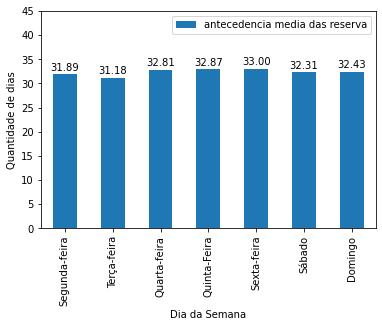

In [20]:
ax = df.plot.bar(x='dia_da_semana', y='antecedencia media das reserva' , ylim=(0, 45), xlabel='Dia da Semana', ylabel='Quantidade de dias')
for p in ax.patches:
    y =  p.get_height() + 0.8
    x = p.get_x() - 0.05
    ax.annotate(f"{p.get_height():.2f}", (x, y))

ax